<a href="https://colab.research.google.com/github/daishek/bigdata-univ/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
path = "automobileEDA.csv"

df = pd.read_csv(path)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [15]:
# Q3

df['peak-rpm'].dtypes # => float64

# la coleration entre peak-rpm et price
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [16]:
# Q4 - correlaton
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

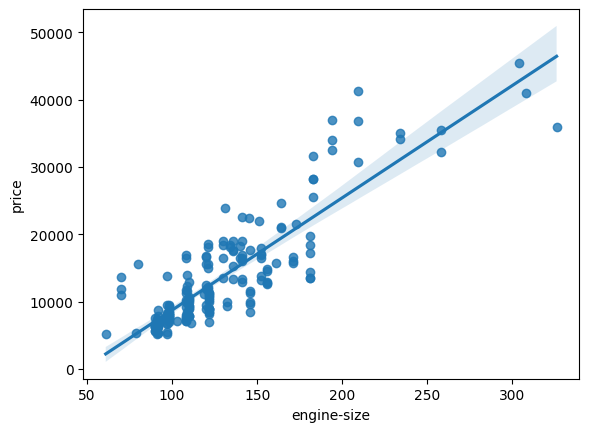

In [22]:
# Q5 - is "engine-size" predective using regplot
sns.regplot(x= "engine-size", y="price", data=df)

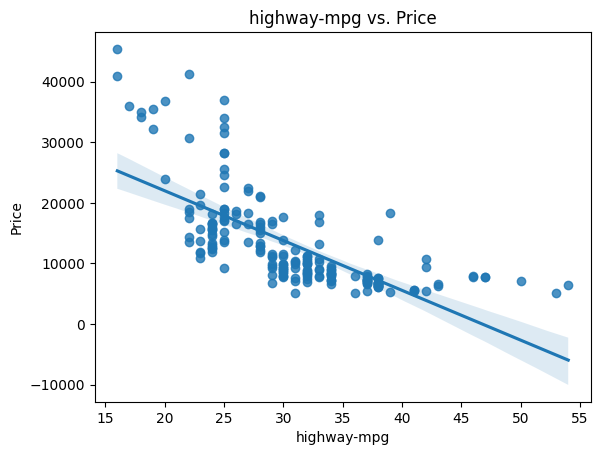

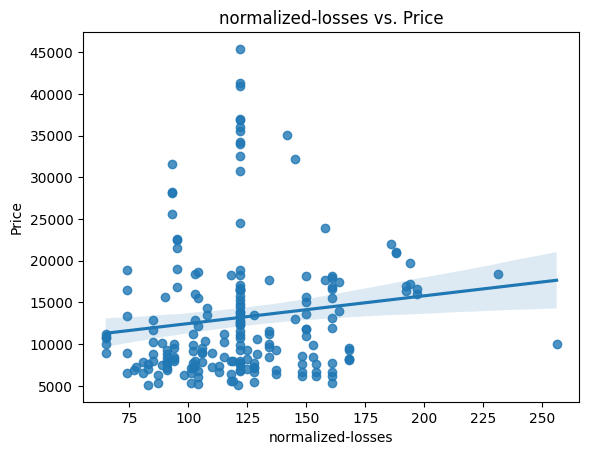

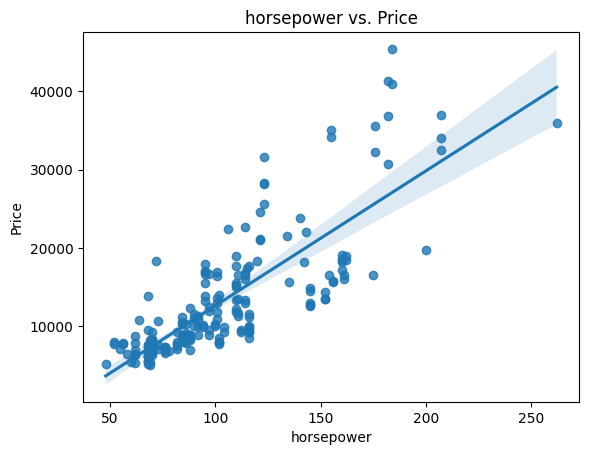

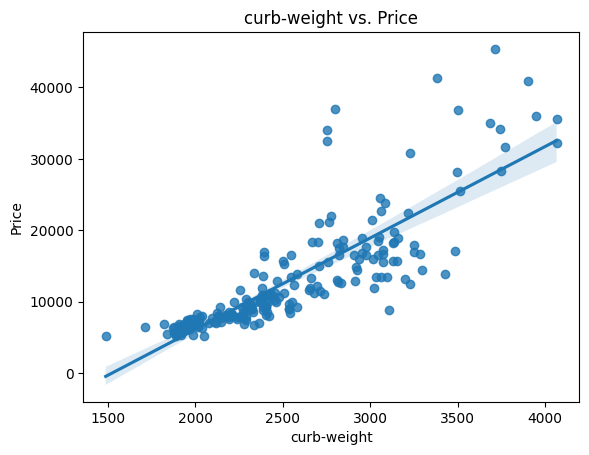

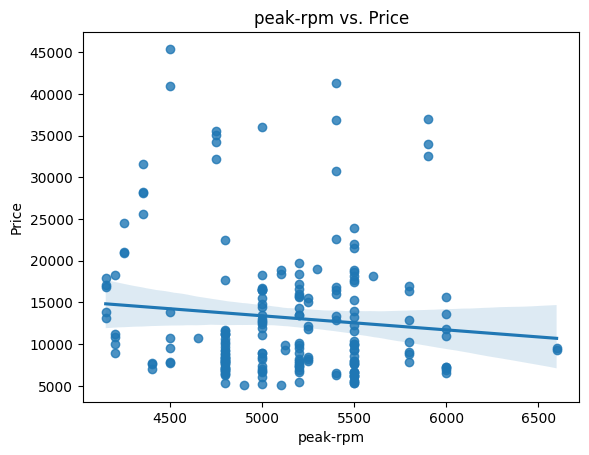

In [31]:
# Q6
columns_to_verify = ["highway-mpg", "normalized-losses", "horsepower", "curb-weight", "peak-rpm"]

for column in columns_to_verify:
  sns.regplot(x= column, y="price", data=df)
  plt.xlabel(column)
  plt.ylabel("Price")
  plt.title(f"{column} vs. Price")
  plt.show()

correlation:  0.08230982738970488


<Axes: xlabel='stroke', ylabel='price'>

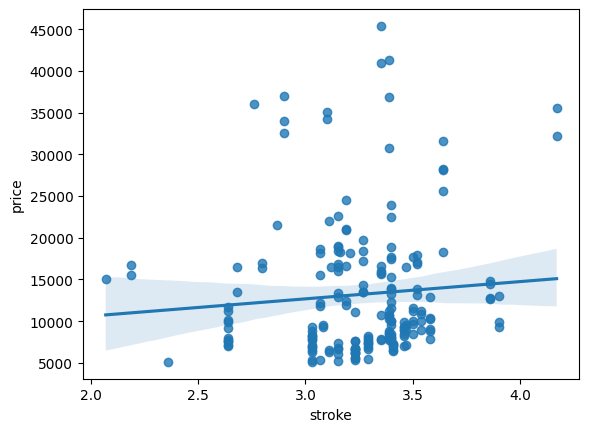

In [30]:
# Q7
print("correlation: ", df['stroke'].corr(df['price']))
sns.regplot(x= "stroke", y="price", data=df)

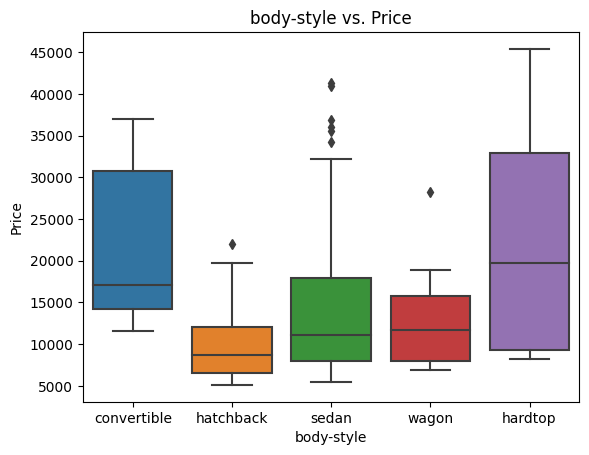

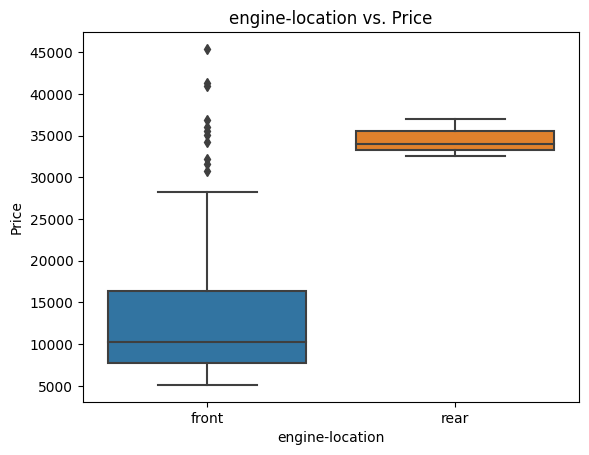

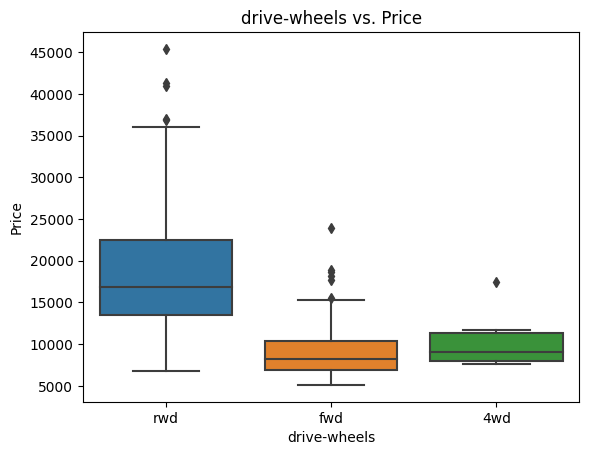

In [35]:
# Q8
columns_to_verify2 = ["body-style", "engine-location", "drive-wheels"]

for column in columns_to_verify2:
  sns.boxplot(x= column, y="price", data=df)
  plt.xlabel(column)
  plt.ylabel("Price")
  plt.title(f"{column} vs. Price")
  plt.show()
